https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

### 1. Import libraries

In [11]:
import pandas as pd
import pandas_profiling

In [21]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 2. Load The Data

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [13]:
pandas_profiling.ProfileReport(dataset)

In [14]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [53]:
#df = dataset.drop(['petal-width'], axis = 1)
df = dataset

In [56]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [32]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [57]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
CART: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


In [35]:
from matplotlib import pyplot

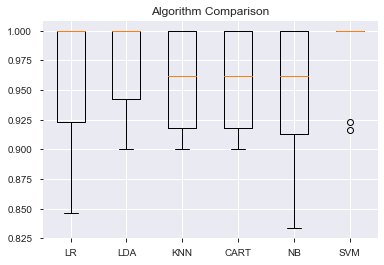

In [58]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [59]:
# Make SVM predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [60]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print("*"*100)
print(confusion_matrix(Y_validation, predictions))
print("*"*100)
print(classification_report(Y_validation, predictions))

0.9666666666666667
****************************************************************************************************
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [61]:
# Make LDA predictions on validation dataset
LDA_model = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
LDA_model.fit(X_train, Y_train)
predictions = LDA_model.predict(X_validation)

In [62]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print("*"*100)
print(confusion_matrix(Y_validation, predictions))
print("*"*100)
print(classification_report(Y_validation, predictions))

1.0
****************************************************************************************************
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
****************************************************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

